In [2]:
#Librerías necesarias
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import csv
import os
from bs4 import BeautifulSoup
from docx import Document
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from bs4 import BeautifulSoup
from docx import Document
import pandas as pd

# Ruta del archivo
file_path = r"D:\Documents\Scrapping Sentimientos Project\Project_repository\Docs Mercadolibre\Apple iPhone 15 (128 GB) - Negro $3217900.docx"

# Leer el contenido del documento .docx
doc = Document(file_path)
html_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])

# Analizar el contenido HTML con BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extraer los comentarios
comments = soup.find_all('p', class_='ui-review-capability-comments__comment__content')
extracted_comments = [comment.get_text(strip=True) for comment in comments]

# Extraer las calificaciones
ratings = []
rating_containers = soup.find_all('div', class_='ui-review-capability-comments__comment__rating')
for container in rating_containers:
    stars = len(container.find_all('use', href='#poly_star_fill'))
    ratings.append(stars)

# Crear un DataFrame con los comentarios y las calificaciones
df = pd.DataFrame({'Comments': extracted_comments, 'Rating': ratings})

# Mostrar el DataFrame
print(df)

                                              Comments  Rating
0    El producto es nuevo. Pero es versión china. I...       5
1    Después de un mes de uso constante puedo decir...       5
2    Hasta ahora todo bien. Al menos el modelo que ...       5
3    Es la versión china, totalmente original pero ...       5
4    Fueron muchas dudas y miedo para decidirme a l...       5
..                                                 ...     ...
125  A pesar de que es un dispositivo original y nu...       1
126  Todo iba bien, configure el celular mientras m...       2
127  Al momento de registrar el equipo sale inegi d...       3
128                                             Bueno.       3
129                            No suministran factura.       1

[130 rows x 2 columns]


In [ ]:
###########################  NOTEBOOK JUAN PABLO ##############################

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

from selenium.webdriver.chrome.options import Options

# Configuración para simular un navegador real
chrome_options = Options()

# Evitar ser detectado por automatización
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")

# Agregar un user-agent personalizado
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"
)

# Inicializar el driver con las opciones configuradas
driver_path = 'D:\Documents\Scrapping Sentimientos Project\Project_repository\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL de la página
url = 'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-pro-4g-dual-sim-256-gb-purpura-8-gb-ram/p/MCO35734320'
driver.get(url)

# Espera inicial para cargar la página
time.sleep(5)

# Haz clic en el botón "Mostrar todas las opiniones" para abrir el modal
try:
    load_more_button = driver.find_element(By.CSS_SELECTOR, 'button.show-more-click[data-testid="see-more"]')
    driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", load_more_button)  # Haz clic en el botón
    time.sleep(5)  # Ajustar el tiempo si es necesario
    print("Botón 'Mostrar todas las opiniones' clicado.")
except NoSuchElementException:
    print("No se encontró el botón para abrir los comentarios.")
    driver.quit()
    exit()

# Espera a que el modal de comentarios esté completamente cargado
try:
    modal_container = WebDriverWait(driver, 20).until(  # Incrementa el tiempo de espera
        EC.presence_of_element_located((By.CSS_SELECTOR, '.andes-modal__content'))
    )
    print("Modal de comentarios encontrado.")
except TimeoutException:
    print("El modal de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.")
    # Guardar el HTML completo para inspección
    with open("page_debug.html", "w", encoding="utf-8") as file:
        file.write(driver.page_source)

    driver.quit()
    exit()

# Forzar el scroll dentro del modal
scroll_pause_time = 2  # Tiempo de espera entre cada scroll

try:
    last_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
    while True:
        # Ejecuta el scroll hacia el final
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", modal_container)
        time.sleep(scroll_pause_time)
        
        # Verifica si la altura ya no cambia
        new_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
        if new_height == last_height:
            print("Se alcanzó el final del modal.")
            break
        last_height = new_height
except Exception as e:
    print(f"Error durante el scroll: {e}")
    driver.quit()
    exit()

# Extrae los comentarios con BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
comment_elements = soup.select('p.ui-review-capability-comments__comment__content')  # Selector para comentarios en el modal
comments = [comment.get_text(strip=True) for comment in comment_elements]

# Imprime los comentarios extraídos
if comments:
    for idx, comment in enumerate(comments, 1):
        print(f"Comentario {idx}: {comment}")
else:
    print("No se encontraron comentarios con el selector actual.")

# Guardar los comentarios en un archivo para inspección
with open("comentarios_extraidos.txt", "w", encoding="utf-8") as file:
    for comment in comments:
        file.write(comment + "\n")

# Cierra el navegador
driver.quit()


Botón 'Mostrar todas las opiniones' clicado.
Modal de comentarios encontrado.
Se alcanzó el final del modal.
Comentario 1: Está bueno y funciona bien, esperemos que no salga chimbo, como mi ex.
Comentario 2: Me parece un movil muy bonito, tiene un duracion de bateria excelente.
Comentario 3: Buen equipo, vengo de usar un redmi note 9, y vaya la diferencia, bastante fluido, transiciones suaves, buen espacio, recomendado si no quieres hacer un gasto tan grande y tener buenas prestaciones.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

from selenium.webdriver.chrome.options import Options

# Configuración para simular un navegador real
chrome_options = Options()

# Evitar ser detectado por automatización
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")

# Agregar un user-agent personalizado
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"
)

# Inicializar el driver con las opciones configuradas
driver_path = 'D:\Documents\Scrapping Sentimientos Project\Project_repository\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL de la página
url = 'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-pro-4g-dual-sim-256-gb-purpura-8-gb-ram/p/MCO35734320'
driver.get(url)

# Espera inicial para cargar la página
time.sleep(5)

# Haz clic en el botón "Mostrar todas las opiniones" para abrir el modal
try:
    load_more_button = driver.find_element(By.CSS_SELECTOR, 'button.show-more-click[data-testid="see-more"]')
    driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", load_more_button)  # Haz clic en el botón
    time.sleep(5)  # Ajustar el tiempo si es necesario
    print("Botón 'Mostrar todas las opiniones' clicado.")
except NoSuchElementException:
    print("No se encontró el botón para abrir los comentarios.")
    driver.quit()
    exit()

# Espera a que el contenedor de comentarios esté completamente cargado
try:
    modal_container = WebDriverWait(driver, 20).until(  # Incrementa el tiempo de espera
        EC.presence_of_element_located((By.CSS_SELECTOR, 'section[data-testid="reviews-desktop"].ui-review-capability'))
    )
    print("Contenedor de comentarios encontrado.")
except TimeoutException:
    print("El contenedor de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.")
    # Guardar el HTML completo para inspección
    with open("page_debug.html", "w", encoding="utf-8") as file:
        file.write(driver.page_source)

    driver.quit()
    exit()

# Forzar el scroll dentro del contenedor
scroll_pause_time = 2  # Tiempo de espera entre cada scroll

try:
    last_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
    while True:
        # Ejecuta el scroll hacia el final
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", modal_container)
        time.sleep(scroll_pause_time)
        
        # Verifica si la altura ya no cambia
        new_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
        if new_height == last_height:
            print("Se alcanzó el final del contenedor.")
            break
        last_height = new_height
except Exception as e:
    print(f"Error durante el scroll: {e}")
    driver.quit()
    exit()

# Extrae los comentarios con BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
comment_elements = soup.select('p.ui-review-capability-comments__comment__content')  # Ajusta el selector si es necesario
comments = [comment.get_text(strip=True) for comment in comment_elements]

# Imprime los comentarios extraídos
if comments:
    for idx, comment in enumerate(comments, 1):
        print(f"Comentario {idx}: {comment}")
else:
    print("No se encontraron comentarios con el selector actual.")

# Guardar los comentarios en un archivo para inspección
with open("comentarios_extraidos.txt", "w", encoding="utf-8") as file:
    for comment in comments:
        file.write(comment + "\n")

# Cierra el navegador
driver.quit()

Botón 'Mostrar todas las opiniones' clicado.
El contenedor de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.
Error durante el scroll: HTTPConnectionPool(host='localhost', port=52466): Max retries exceeded with url: /session/fabda741f09cb2c0efa549b0ab8af3ac/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000187FB4BBA60>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))


MaxRetryError: HTTPConnectionPool(host='localhost', port=52466): Max retries exceeded with url: /session/fabda741f09cb2c0efa549b0ab8af3ac/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000187FB4BBA00>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))

: 

In [1]:
############################ FINAL DE VARIOS DOC WORD ############################33

In [3]:
import os
from bs4 import BeautifulSoup
from docx import Document
import pandas as pd

# Ruta de la carpeta que contiene los documentos
folder_path = r"D:\Documents\Scrapping Sentimientos Project\Project_repository\Webscrapping\Mercadolibre\HTMLs Mercadolibre"

# Lista para almacenar los datos de todos los archivos
all_data = []

# Iterar sobre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.docx'):  # Verificar si el archivo es .docx
        file_path = os.path.join(folder_path, filename)

        # Leer el contenido del documento .docx
        doc = Document(file_path)
        html_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])

        # Analizar el contenido HTML con BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extraer los comentarios
        comments = soup.find_all('p', class_='ui-review-capability-comments__comment__content')
        extracted_comments = [comment.get_text(strip=True) for comment in comments]

        # Extraer las calificaciones
        ratings = []
        rating_containers = soup.find_all('div', class_='ui-review-capability-comments__comment__rating')
        for container in rating_containers:
            stars = len(container.find_all('use', href='#poly_star_fill'))
            ratings.append(stars)

        # Asegurar que comentarios y calificaciones tengan el mismo tamaño
        if len(extracted_comments) > len(ratings):
            ratings.extend([None] * (len(extracted_comments) - len(ratings)))
        elif len(ratings) > len(extracted_comments):
            extracted_comments.extend([None] * (len(ratings) - len(extracted_comments)))

        # Agregar los datos al conjunto general
        for comment, rating in zip(extracted_comments, ratings):
            all_data.append({'Filename': filename, 'Comment': comment, 'Rating': rating})

# Crear el DataFrame con el nombre "mercadolibre_reviews"
mercadolibre_reviews = pd.DataFrame(all_data)

# Guardar el DataFrame en un archivo CSV (opcional)
mercadolibre_reviews.to_csv('all_comments_and_ratings.csv', index=False)

# Mostrar el DataFrame
mercadolibre_reviews

,Filename,Comment,Rating
0,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Es un dispositivo magnifico, se adapta a la ne...",5
1,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Excelente precio para un equipo tan completo, ...",5
2,Apple iPhone 11 (128 GB) - Negro $1754910.docx,No sabía que llegaba sin cargador.,4
3,Apple iPhone 11 (128 GB) - Negro $1754910.docx,Ha sido excelente este producto. El celular ha...,5
4,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Buen producto, totalmente nuevo.",5
...,...,...,...
2494,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,Es un buen teléfono gama media. Y muy bonito. ...,5
2495,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,,5
2496,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,Lo compre en el rush de un producto nuevo del ...,5
2497,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,"Perfecto , su cámara es muy buena , el diseño ...",5


In [4]:
#Cuenta de comentarios extraidos
# Agrupar por "Filename" y contar los comentarios únicos
grouped_comments = mercadolibre_reviews.groupby('Filename')['Comment'].count()

print(grouped_comments)

Filename
Apple iPhone 11 (128 GB) - Negro $1754910.docx                                         83
Apple iPhone 13 (128 GB) - Azul $2499900.docx                                         180
Apple iPhone 14 (128 GB) - Medianoche $3169000.docx                                    50
Apple iPhone 15 (128 GB) - Negro $3217900.docx                                        130
Samsung A05s 4G Dual SIM 128 GB Negro 6 GB RAM $431433.docx                            90
Samsung Galaxy A15 4G Dual SIM 256 GB azul oscuro 8 GB RAM $599900.docx               173
Samsung Galaxy A25 5G 5G 128 GB azul 6 GB RAM $849900.docx                             71
Samsung Galaxy A35 5g 256 GB Azul oscuro 8 GB RAM $949900.docx                        106
Samsung Galaxy A55 5G Dual SIM 256 GB azul oscuro 8 GB RAM $1387900.docx              210
Samsung Galaxy S23 Ultra (eSIM) 5G Dual SIM 512 GB green 12 GB RAM $4349900.docx      210
Samsung Galaxy S24 Ultra 5G Dual SIM 512 GB titanium black 12 GB RAM $4529900.docx    111
X

In [23]:
###################################### IMPORTAR DATAFRAME DESDE MYSQL #########################################

In [24]:
# Configura los detalles de la conexión
user = 'root'  # Cambia según tu configuración
password = 'Elefantes1507'  # Cambia según tu configuración
host = 'localhost'  # O 127.0.0.1
port = '3306'  # Puerto predeterminado de MySQL
database = 'sentimental_analysis_db'  # Nombre de tu base de datos

# Crear el motor de conexión
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")


# Cargar la tabla completa
df_as = pd.read_sql("SELECT * FROM FILTERED_reviews", con=engine)
df_as

,comentario,calificacion,codigo,Enlace,Sitio Web,Marca,Modelo estandar,Precio
0,Si corresponde a la foto tiene un excelente re...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
1,El tamaño es el apropiado y para cargar fácilm...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
2,"Muy buen producto a un excelente precio, llego...",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
3,"Me gusto mucho, y fue rápido la llegada",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
4,"Cumple lo que promete, es un lindo celular",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
...,...,...,...,...,...,...,...,...
9615,Es un buen teléfono gama media. Y muy bonito. ...,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9616,,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9617,Lo compre en el rush de un producto nuevo del ...,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9618,"Perfecto , su cámara es muy buena , el diseño ...",5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940


In [3]:
###################################### IMPORTAR DATAFRAME DESDE CSV #########################################}
df_as = pd.read_csv("../Analisis de Sentimientos/sentiment_analysis.csv")

# Eliminar filas duplicadas basadas en las columnas "comentario" y "Modelo estandar"
df_as = df_as.drop_duplicates(subset=["comentario", "Modelo estandar"], keep=False)

# Eliminar filas donde 'comentario_limpio' sea nulo o vacío
df_as = df_as[df_as['comentario_limpio'].notnull() & (df_as['comentario_limpio'].str.strip() != '')]

print(df_as.head())

                                          comentario  calificacion codigo  \
0  Si corresponde a la foto tiene un excelente re...             5    FX1   
1  El tamaño es el apropiado y para cargar fácilm...             5    FX1   
2  Muy buen producto a un excelente precio, llego...             5    FX1   
3            Me gusto mucho, y fue rápido la llegada             5    FX1   
4         Cumple lo que promete, es un lindo celular             5    FX1   

                                              Enlace  Sitio Web   Marca  \
0  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
1  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
2  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
3  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
4  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   

      Modelo estandar   Precio  \
0  Xiaomi Poco X6 Pro  1899900   
1  Xiaomi Poco X6 

In [4]:
###################################### Some Exploratory Data Analysis #########################################

In [5]:
# Definir una función para clasificar comentarios como negativos o positivos
def clasificar_comentarios(df):
    df['Comentario_Negativo'] = df['Calificacion Predicha'].apply(lambda x: 1 if x <= 3 else 0)
    df['Comentario_Positivo'] = df['Calificacion Predicha'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Aplicar la clasificación a los datos
df_as = clasificar_comentarios(df_as)

# Agrupar por 'Marca' y 'Modelo estandar' y calcular las métricas
resumen_reviews = df_as.groupby(['Marca', 'Modelo estandar']).agg(
    Comentarios=('Calificacion Predicha', 'size'),   # Contar el número de comentarios
    Calificacion_Promedio=('Calificacion Predicha', 'mean'),  # Calcular promedio de calificaciones
    Precio_Promedio=('Precio', 'mean'),  # Calcular promedio de precios
    Comentarios_Negativos=('Comentario_Negativo', 'sum'),  # Contar comentarios negativos
    Comentarios_Positivos=('Comentario_Positivo', 'sum')  # Contar comentarios positivos
).reset_index()

# Ordenar por el número de comentarios de menor a mayor
resumen_reviews = resumen_reviews.sort_values(by='Comentarios', ascending=True)

# Mostrar el resultado
print(resumen_reviews)

      Marca                Modelo estandar  Comentarios  \
5   Samsung             Samsung Galaxy A25          188   
4   Samsung             Samsung Galaxy A15          202   
11   Xiaomi           Xiaomi Redmi Note 13          212   
10   Xiaomi               Xiaomi Redmi 13C          241   
6   Samsung             Samsung Galaxy A35          246   
3     Apple                      IPhone 15          270   
13   Xiaomi  Xiaomi Redmi Note 13 Pro Plus          293   
9    Xiaomi             Xiaomi Poco X6 Pro          308   
12   Xiaomi       Xiaomi Redmi Note 13 Pro          346   
1     Apple                      IPhone 13          420   
2     Apple                      IPhone 14          549   
0     Apple                      IPhone 11         1076   
8   Samsung              Samsung S24 Ultra         1383   
7   Samsung             Samsung Galaxy A55         1756   

    Calificacion_Promedio  Precio_Promedio  Comentarios_Negativos  \
5                4.090426     1.095335e+06   

In [6]:
# Agrupar por 'Marca' y calcular las métricas
resumen_por_marca = df_as.groupby('Marca').agg(
    Comentarios=('Calificacion Predicha', 'size'),  # Contar el número de comentarios
    Calificacion_Promedio=('Calificacion Predicha', 'mean'),  # Calcular promedio de calificaciones
    Precio_Promedio=('Precio', 'mean'),  # Calcular promedio de precios
    Comentarios_Negativos=('Comentario_Negativo', 'sum'),  # Contar comentarios negativos
    Comentarios_Positivos=('Comentario_Positivo', 'sum')  # Contar comentarios positivos
).reset_index()

# Ordenar por el número de comentarios de menor a mayor
resumen_por_marca = resumen_por_marca.sort_values(by='Comentarios', ascending=True)

# Mostrar el resultado
print(resumen_por_marca)

     Marca  Comentarios  Calificacion_Promedio  Precio_Promedio  \
2   Xiaomi         1400               4.470000     1.130749e+06   
0    Apple         2315               4.623326     2.815690e+06   
1  Samsung         3775               4.598675     3.908440e+06   

   Comentarios_Negativos  Comentarios_Positivos  
2                    162                   1238  
0                    206                   2109  
1                    337                   3438  


In [7]:
pip install symspellpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from symspellpy.symspellpy import SymSpell, Verbosity
import json
import pandas as pd

In [9]:
###################################### Topic Modeling General (Unsupervised) #########################################

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Usar directamente la columna preprocesada
comentarios = df_as['comentario_limpio'].dropna()

# Crear una matriz de conteo a partir de los comentarios limpios
vectorizer = CountVectorizer(max_features=5000)  # No necesitas definir stopwords aquí, ya están filtradas
X = vectorizer.fit_transform(comentarios)

# Aplicar LDA para el modelado de temas
lda = LatentDirichletAllocation(n_components=5, random_state=7)
lda.fit(X)

# Mostrar los temas principales
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))  # Top 10 palabras por tema
    print()

Tema 1:
muy excelente calidad producto buena buen precio camara rapido equipo

Tema 2:
muy bateria compre hace mucho dia no ma telefono camara

Tema 3:
no cargador sin perfecto nuevo original producto iphone solo comprar

Tema 4:
no bien celular muy ma si super gracias equipo camara

Tema 5:
samsung no mejor telefono gama muy celular camara siempre ultra



In [11]:
# Obtener todas las marcas únicas
marcas = df_as['Marca'].unique()

# Iterar por cada marca
for marca in marcas:
    print(f"\nTopic Modeling para la marca: {marca}\n")
    
    # Filtrar los comentarios de la marca actual
    comentarios_marca = df_as[df_as['Marca'] == marca]['comentario_limpio'].dropna()
    
    # Crear matriz de conteo
    X_marca = vectorizer.fit_transform(comentarios_marca)
    
    # Aplicar LDA
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    # Mostrar los temas
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        print(f"Tema {topic_idx + 1}:")
        print(" ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic Modeling para la marca: Xiaomi

Tema 1:
excelente calidad producto precio buena muy buen celular relacion perfecto
Tema 2:
muy excelente buen bien rapido bueno equipo celular camara no
Tema 3:
no bateria carga dura cargador dia adaptador muy unico rapido
Tema 4:
muy no bateria gusto buena mucho telefono celular camara dia
Tema 5:
foto igual buena calidad si muy bien no corresponde ve


Topic Modeling para la marca: Samsung

Tema 1:
no gama celular muy samsung bateria ma mejor telefono alta
Tema 2:
excelente producto buen calidad muy precio equipo buena camara mejor
Tema 3:
telefono ma no dia samsung momento bien ultra inteligencia artificial
Tema 4:
pantalla telefono ma no sin video gama samsung uso medium
Tema 5:
muy camara buena rapido bateria hace telefono compre bien movil


Topic Modeling para la marca: Apple

Tema 1:
buen no producto original apple equipo nuevo iphone celular muy
Tema 2:
muy producto buen rapido llego excelente bien bueno entrega super
Tema 3:
excelente ca

In [12]:
# Lista para almacenar los resultados
results = []

# Iterar por cada marca
for marca in marcas:
    comentarios_marca = df_as[df_as['Marca'] == marca]['comentario_limpio'].dropna()
    X_marca = vectorizer.fit_transform(comentarios_marca)
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        topic_words = " ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]])
        results.append({'Marca': marca, 'Tema': topic_idx + 1, 'Palabras clave': topic_words})

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
print(df_results)

      Marca  Tema                                     Palabras clave
0    Xiaomi     1  excelente calidad producto precio buena muy bu...
1    Xiaomi     2  muy excelente buen bien rapido bueno equipo ce...
2    Xiaomi     3  no bateria carga dura cargador dia adaptador m...
3    Xiaomi     4  muy no bateria gusto buena mucho telefono celu...
4    Xiaomi     5  foto igual buena calidad si muy bien no corres...
5   Samsung     1  no gama celular muy samsung bateria ma mejor t...
6   Samsung     2  excelente producto buen calidad muy precio equ...
7   Samsung     3  telefono ma no dia samsung momento bien ultra ...
8   Samsung     4  pantalla telefono ma no sin video gama samsung...
9   Samsung     5  muy camara buena rapido bateria hace telefono ...
10    Apple     1  buen no producto original apple equipo nuevo i...
11    Apple     2  muy producto buen rapido llego excelente bien ...
12    Apple     3  excelente calidad buena foto igual tamaño prod...
13    Apple     4  producto tal ex

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filtrar comentarios negativos (calificación <= 3)
comentarios_negativos = df_as[df_as['calificacion'] <= 3]

# Obtener todas las marcas únicas
marcas = comentarios_negativos['Marca'].unique()

# Configurar el vectorizador
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # Sin stopwords adicionales

# Iterar por cada marca
for marca in marcas:
    print(f"\nTopic Modeling para la marca: {marca} (Comentarios Negativos)\n")
    
    # Filtrar los comentarios de la marca actual
    comentarios_marca = comentarios_negativos[comentarios_negativos['Marca'] == marca]['comentario_limpio'].dropna()
    
    # Verificar si hay suficientes comentarios
    if len(comentarios_marca) < 5:  # Evitar análisis si hay pocos comentarios
        print(f"No hay suficientes comentarios negativos para {marca}.")
        continue
    
    # Crear matriz de conteo
    X_marca = vectorizer.fit_transform(comentarios_marca)
    
    # Aplicar LDA
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    # Mostrar los temas
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        print(f"Tema {topic_idx + 1}:")
        print(" ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic Modeling para la marca: Xiaomi (Comentarios Negativos)

Tema 1:
no producto muy bateria carga celular bueno dura rapido bloquea
Tema 2:
garantia muy malo dia bateria despues bueno carga solo telefono
Tema 3:
queda cambio pantalla inicie configuracion colores solo general celular sin
Tema 4:
no cargador si equipo bien fotos bateria calidad dura sirve
Tema 5:
no telefono dia calidad ma equipo garantia bateria buena recomiendo


Topic Modeling para la marca: Samsung (Comentarios Negativos)

Tema 1:
dura bateria no dia compre sim camara muy producto poco
Tema 2:
mejor poco pantalla calienta bueno bateria mucho utilizar camara resolucion
Tema 3:
no sin bateria compre producto dia hace cargador bueno equipo
Tema 4:
no muy samsung celular buena compre si hacer rapido calienta
Tema 5:
no dia muy cargador pantalla telefono trae camara dispositivo gran


Topic Modeling para la marca: Apple (Comentarios Negativos)

Tema 1:
no equipo excelente entrega original producto sim momento tenia pan

In [14]:
################ Modelado de Temas Supervisado

In [15]:
import pandas as pd
import re

# Definir los temas y las palabras clave asociadas
temas = {
    "Cámara": [
        "cámara", "fotos", "fotografía", "frontal", "lente", "video", "calibracion",
        "fotografías", "grabación", "selfie", "zoom", "ángulo", "nitidez", "flash",
        "exposición", "foco", "captura", "enfoca"
    ],
    "Batería": [
        "batería", "carga", "cargador", "dura", "energía", "duración", "cargar", 
        "inalámbrica", "powerbank", "sobrecarga", "sobrecalentamiento", "voltaje", "descarga", "rendimiento de batería"
    ],
    "Precio": [
        "precio", "caro", "barato", "costo", "económico", "inversión", "vale", "asequible", 
        "promoción", "oferta", "calidad-precio", "rebaja", "accesible", "cuesta", "dinero", "valor", "gasto", "compensación"
    ],
    "Rendimiento": [
        "traba", "buggea", "ram", "queda pegado", "congelado", "corre", "recalienta", "Google", "facebook", "redes sociales",
        "rendimiento", "rápido", "fluido", "lento", "procesador", "eficiencia", "memoria", 
        "potencia", "velocidad", "multitarea", "procesos", "aplicaciones",
        "juegos", "optimización", "frecuencia", "capacidad", "retraso", "lag", "software"
    ],
    "Pantalla": [
        "pantalla", "brillo", "visualización", "display", "imagen", "tactil", #"tamaño",
        "OLED", "LCD", "AMOLED", "táctil", "refresco", "frecuencia"
    ]
}

# Definir frases de exclusión para palabras ambiguas
exclusiones = {
    "fotos": ["igual a las fotos", "fiel a las fotos", "igual al de las fotos",  "como en las fotos", "identico a las fotos", "a las fotos", "a la fotos"]
}

# Función para asignar temas con exclusión de contextos específicos
def asignar_tema(comentario, temas, exclusiones):
    comentario_temas = []
    for tema, palabras_clave in temas.items():
        for palabra in palabras_clave:
            # Verificar si la palabra está en el comentario
            if re.search(rf"\b{re.escape(palabra)}\b", comentario, re.IGNORECASE):
                # Aplicar la regla de exclusión
                excluir = False
                if palabra in exclusiones:
                    for frase_exclusion in exclusiones[palabra]:
                        if frase_exclusion in comentario:
                            excluir = True
                            break
                if not excluir:
                    comentario_temas.append(tema)
                    break  # Evita asignar el mismo tema varias veces
    return comentario_temas

# Asignar temas a cada comentario en la columna 'comentario_limpio'
df_as['Temas'] = df_as['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))

# Expandir los temas en filas separadas para un análisis más fácil
df_tematicos = df_as.explode('Temas')

# Calcular métricas por tema y marca
resultados = df_tematicos.groupby(['Marca', 'Temas']).agg(
    Total_Comentarios=('comentario', 'count'),
    Calificacion_Promedio=('Calificacion Predicha', 'mean')
).reset_index()

# Ordenar los resultados por marca y tema
resultados = resultados.sort_values(['Marca', 'Temas'])

# Mostrar los resultados
print(resultados)

# Opcional: Exportar el DataFrame df_as como un archivo CSV

# Reemplazar saltos de línea (\n y \r) con un espacio
df_as['comentario'] = df_as['comentario'].str.replace(r'\r\n|\r|\n', ' ', regex=True)
df_as['comentario_limpio'] = df_as['comentario_limpio'].str.replace(r'\r\n|\r|\n', ' ', regex=True)
df_as['comentario_limpio_sin_lematizar'] = df_as['comentario_limpio_sin_lematizar'].str.replace(r'\r\n|\r|\n', ' ', regex=True)

#df_as.to_csv("D:/Documents/Scrapping Sentimientos Project/Project_repository/Analisis de Sentimientos/df_temas.csv", 
#             index=False, encoding='utf-8')

      Marca        Temas  Total_Comentarios  Calificacion_Promedio
0     Apple      Batería                 89               4.022472
1     Apple       Cámara                 75               4.640000
2     Apple     Pantalla                 63               4.650794
3     Apple       Precio                171               4.678363
4     Apple  Rendimiento                 98               4.540816
5   Samsung      Batería                300               3.983333
6   Samsung       Cámara                404               4.596535
7   Samsung     Pantalla                379               4.527704
8   Samsung       Precio                340               4.502941
9   Samsung  Rendimiento                621               4.550725
10   Xiaomi      Batería                183               3.934426
11   Xiaomi       Cámara                 66               4.181818
12   Xiaomi     Pantalla                 88               4.045455
13   Xiaomi       Precio                289               4.57

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\1642706447.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\1642706447.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))


Gráfico Normalizado para Comentarios Positivos


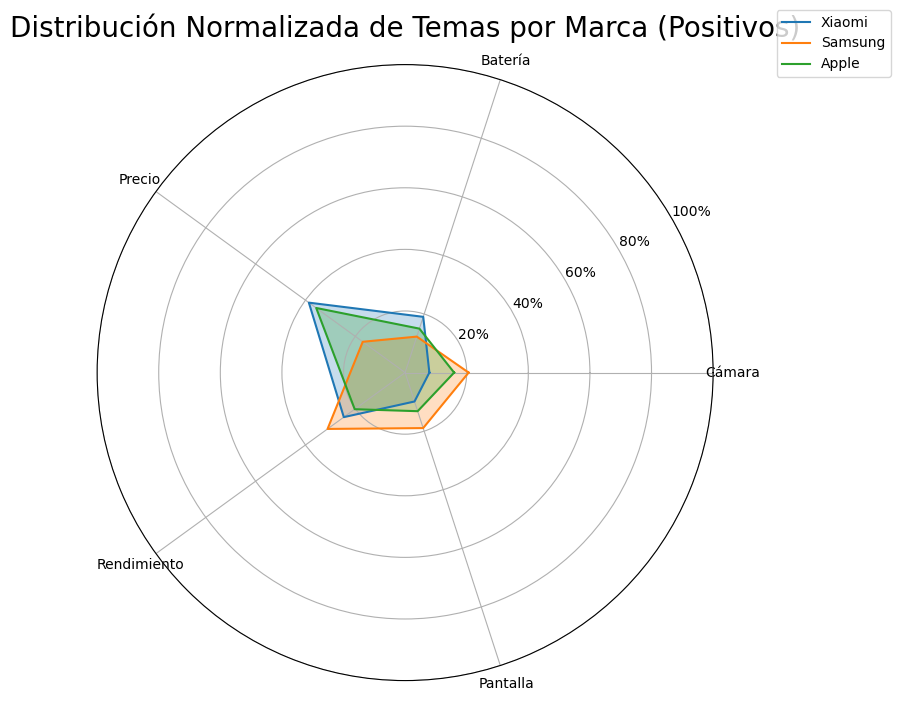

Gráfico Normalizado para Comentarios Negativos


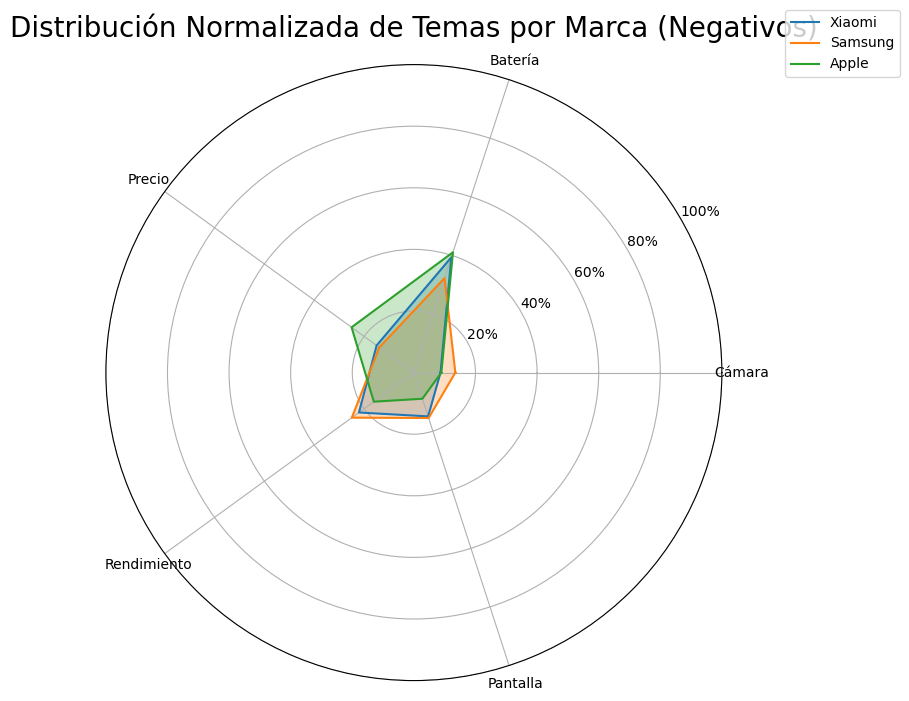

Datos para Comentarios Positivos:
    Marca         Tema  Porcentaje_Normalizado
0  Xiaomi       Cámara                    7.87
1  Xiaomi      Batería                   19.03
2  Xiaomi       Precio                   38.63
3  Xiaomi  Rendimiento                   24.61
4  Xiaomi     Pantalla                    9.87
Datos para Comentarios Negativos:
    Marca         Tema  Porcentaje_Normalizado
0  Xiaomi       Cámara                    8.66
1  Xiaomi      Batería                   39.37
2  Xiaomi       Precio                   14.96
3  Xiaomi  Rendimiento                   22.05
4  Xiaomi     Pantalla                   14.96


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Función para asignar temas con exclusiones
def asignar_tema(comentario, temas, exclusiones={}):
    comentario_temas = []
    for tema, palabras_clave in temas.items():
        for palabra in palabras_clave:
            if re.search(rf"\b{re.escape(palabra)}\b", comentario, re.IGNORECASE):
                # Aplicar la regla de exclusión
                excluir = False
                if palabra in exclusiones:
                    for frase_exclusion in exclusiones[palabra]:
                        if frase_exclusion in comentario:
                            excluir = True
                            break
                if not excluir:
                    comentario_temas.append(tema)
                    break
    return comentario_temas

# Dividir el DataFrame en positivos y negativos
positivos = df_as[df_as['Calificacion Predicha'] > 3]
negativos = df_as[df_as['Calificacion Predicha'] <= 3]

# Función para calcular el conteo de temas por marca
def calcular_temas_por_marca(df, temas, exclusiones={}):
    # Asignar temas a cada comentario
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
    
    # Expandir los temas en filas separadas
    df_tematicos = df.explode('Temas')
    
    # Calcular el total de comentarios por tema y marca
    resultados = df_tematicos.groupby(['Marca', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por marca para positivos y negativos (sin exclusiones)
temas_positivos = calcular_temas_por_marca(positivos, temas, {})
temas_negativos = calcular_temas_por_marca(negativos, temas, {})

# Función para preparar y exportar los datos normalizados para gráficos de radar
def preparar_datos_radar_normalizado_exportar(resultados, marcas, temas):
    radar_data = {}
    data_list = []  # Lista para almacenar filas del DataFrame
    
    for marca in marcas:
        marca_data = resultados[ resultados['Marca'] == marca ]
        total_comentarios = marca_data['Total_Comentarios'].sum()  # Total de comentarios de la marca
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = round((total / total_comentarios) * 100, 2) if total_comentarios > 0 else 0  # Normalizar con 2 decimales
            valores.append(porcentaje)
            
            # Agregar fila al DataFrame con valores normalizados
            data_list.append({'Marca': marca, 'Tema': tema, 'Porcentaje_Normalizado': porcentaje})
        
        radar_data[marca] = valores

    # Crear DataFrame con los resultados
    df_radar = pd.DataFrame(data_list)
    return radar_data, df_radar

# Preparar los datos normalizados para gráficos y exportar como DataFrame
marcas = df_as['Marca'].unique()
radar_positivos_normalizado, df_positivos = preparar_datos_radar_normalizado_exportar(temas_positivos, marcas, temas)
radar_negativos_normalizado, df_negativos = preparar_datos_radar_normalizado_exportar(temas_negativos, marcas, temas)

# Exportar los DataFrames a archivos CSV
df_positivos.to_csv("D:/Documents/Scrapping Sentimientos Project/Project_repository/Analisis de Sentimientos/comentarios_positivos_radar.csv", index=False, encoding='utf-8')
df_negativos.to_csv("D:/Documents/Scrapping Sentimientos Project/Project_repository/Analisis de Sentimientos/comentarios_negativos_radar.csv", index=False, encoding='utf-8')

# Función para graficar radar charts normalizados
def graficar_radar_normalizado(data, temas, titulo):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for marca, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=marca)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(titulo, size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Graficar radar charts normalizados
print("Gráfico Normalizado para Comentarios Positivos")
graficar_radar_normalizado(radar_positivos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Positivos)")

print("Gráfico Normalizado para Comentarios Negativos")
graficar_radar_normalizado(radar_negativos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Negativos)")

# Mostrar los DataFrames generados
print("Datos para Comentarios Positivos:")
print(df_positivos.head())

print("Datos para Comentarios Negativos:")
print(df_negativos.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\3729563018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\3729563018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))


Gráfico Normalizado para Comentarios Positivos


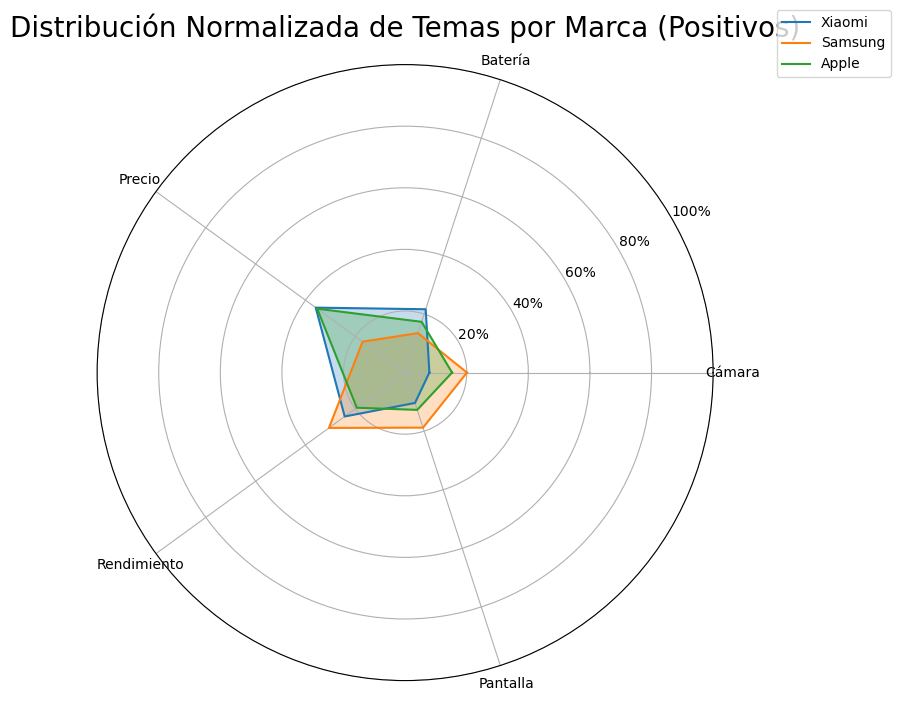

Gráfico Normalizado para Comentarios Negativos


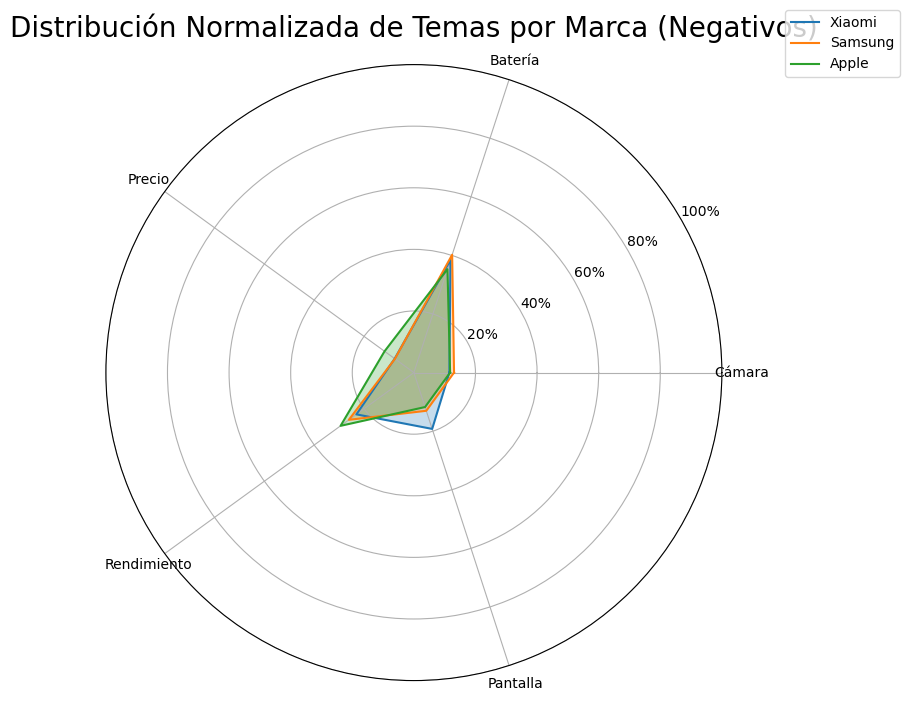

In [17]:
# Dividir el DataFrame en positivos y negativos usando 'calificacion'
positivos = df_as[df_as['calificacion'] > 3]
negativos = df_as[df_as['calificacion'] <= 3]

# Función para calcular el conteo de temas por marca
def calcular_temas_por_marca(df, temas, exclusiones={}):
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
    df_tematicos = df.explode('Temas')
    resultados = df_tematicos.groupby(['Marca', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por marca para positivos y negativos
temas_positivos = calcular_temas_por_marca(positivos, temas, {})
temas_negativos = calcular_temas_por_marca(negativos, temas, {})

# Función para preparar los datos para gráficos de araña
def preparar_datos_radar(resultados, marcas, temas):
    radar_data = {}
    for marca in marcas:
        marca_data = resultados[resultados['Marca'] == marca]
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            valores.append(total)
        radar_data[marca] = valores
    return radar_data

# Obtener marcas únicas
marcas = df_as['Marca'].unique()

# Preparar los datos para gráficos
radar_positivos = preparar_datos_radar(temas_positivos, marcas, temas)
radar_negativos = preparar_datos_radar(temas_negativos, marcas, temas)

# Función para preparar los datos normalizados para gráficos de radar
def preparar_datos_radar_normalizado(resultados, marcas, temas):
    radar_data = {}
    for marca in marcas:
        marca_data = resultados[ resultados['Marca'] == marca]
        total_comentarios = marca_data['Total_Comentarios'].sum()  # Total de comentarios de la marca
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = (total / total_comentarios) * 100 if total_comentarios > 0 else 0  # Normalizar
            valores.append(porcentaje)
        radar_data[marca] = valores
    return radar_data

# Preparar los datos normalizados para gráficos
radar_positivos_normalizado = preparar_datos_radar_normalizado(temas_positivos, marcas, temas)
radar_negativos_normalizado = preparar_datos_radar_normalizado(temas_negativos, marcas, temas)

# Función para graficar radar charts normalizados
def graficar_radar_normalizado(data, temas, titulo):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for marca, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=marca)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(titulo, size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])  # Límites de porcentaje
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Graficar radar charts normalizados
print("Gráfico Normalizado para Comentarios Positivos")
graficar_radar_normalizado(radar_positivos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Positivos)")

print("Gráfico Normalizado para Comentarios Negativos")
graficar_radar_normalizado(radar_negativos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Negativos)")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\8890656.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\8890656.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))


Gráfico Normalizado para Comentarios Positivos - Xiaomi


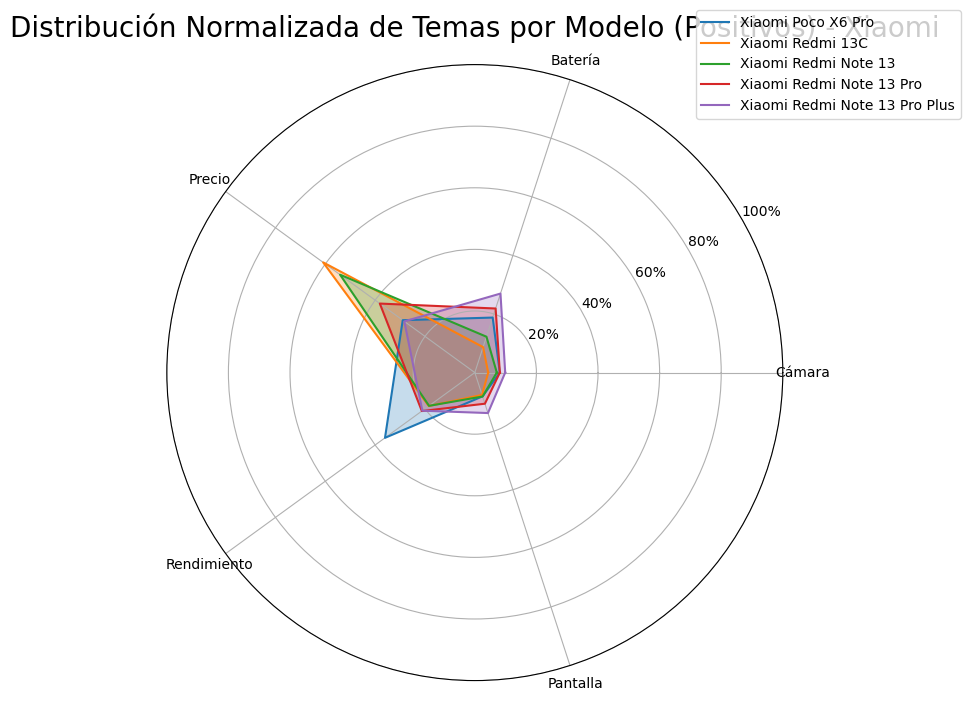

Gráfico Normalizado para Comentarios Negativos - Xiaomi


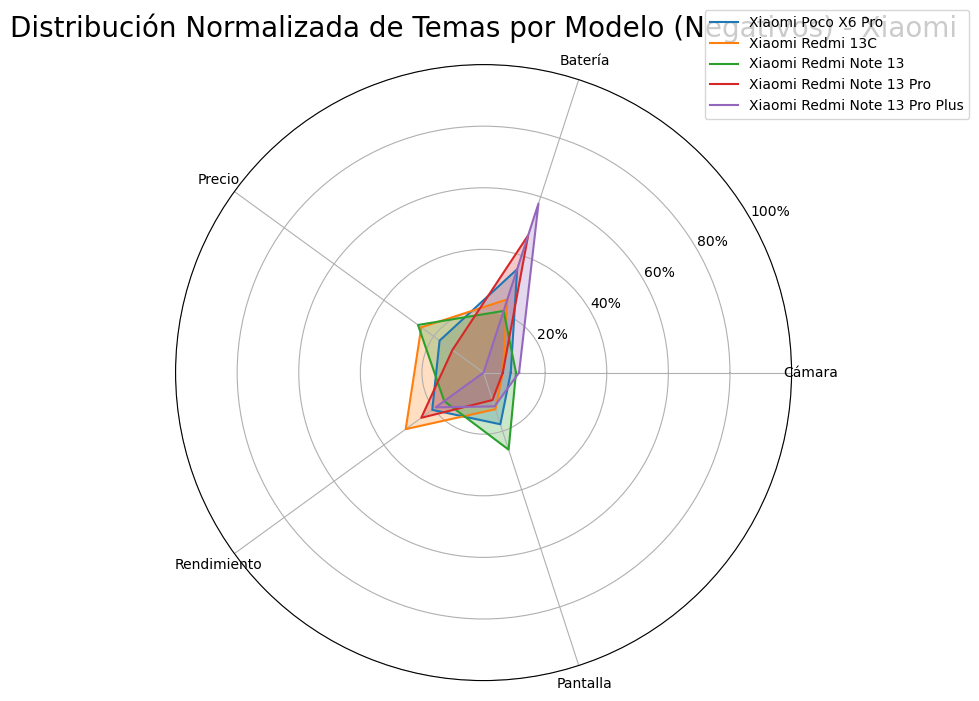

Gráfico Normalizado para Comentarios Positivos - Samsung


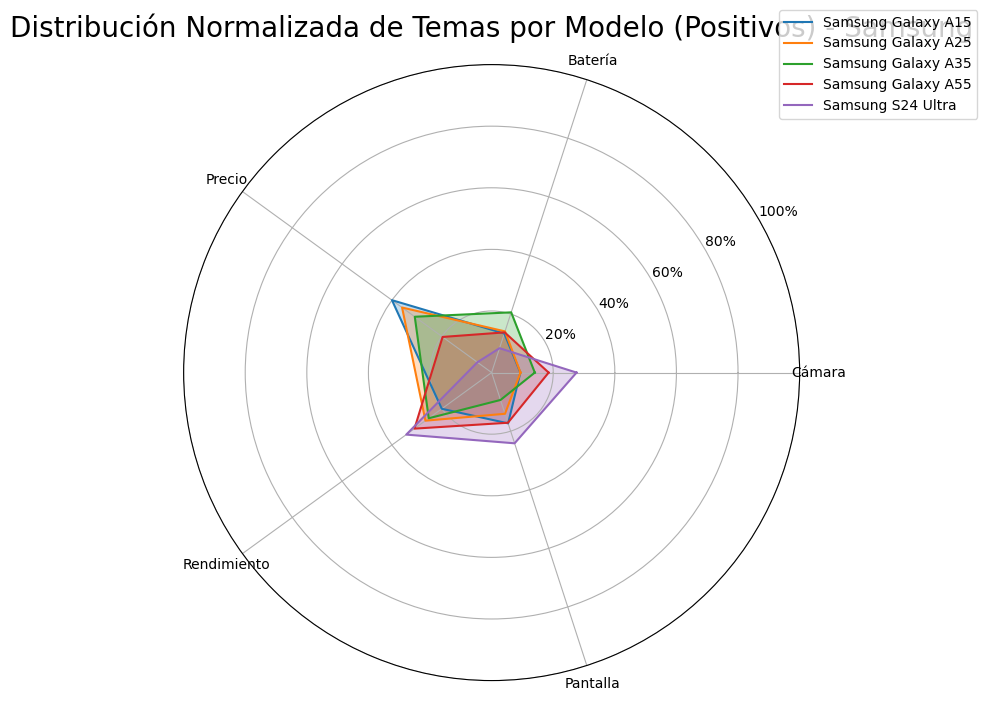

Gráfico Normalizado para Comentarios Negativos - Samsung


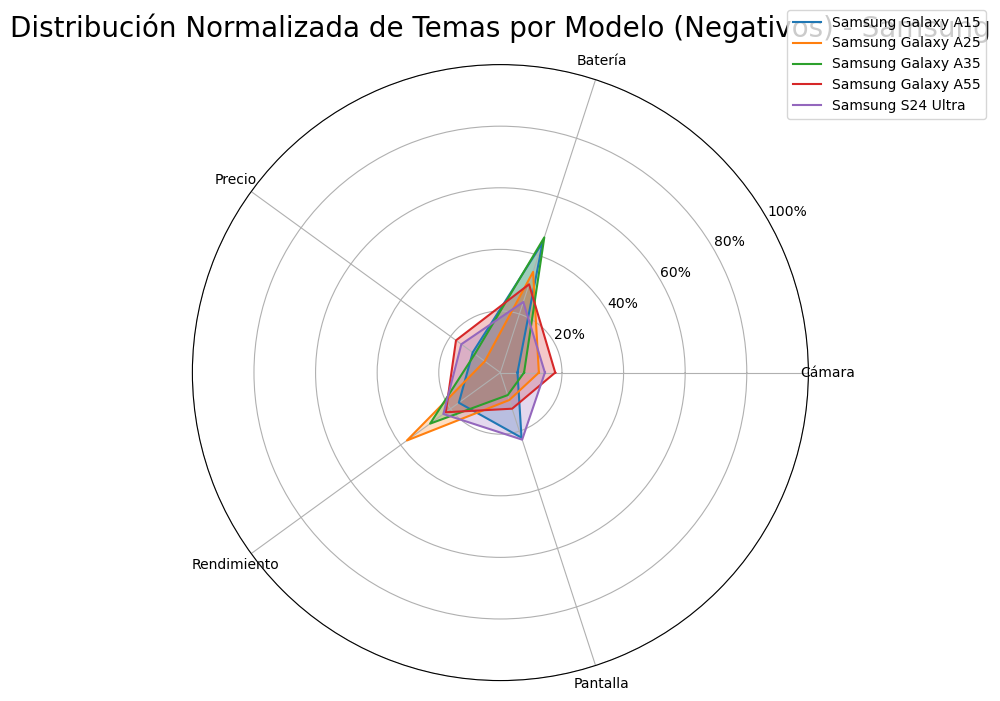

Gráfico Normalizado para Comentarios Positivos - Apple


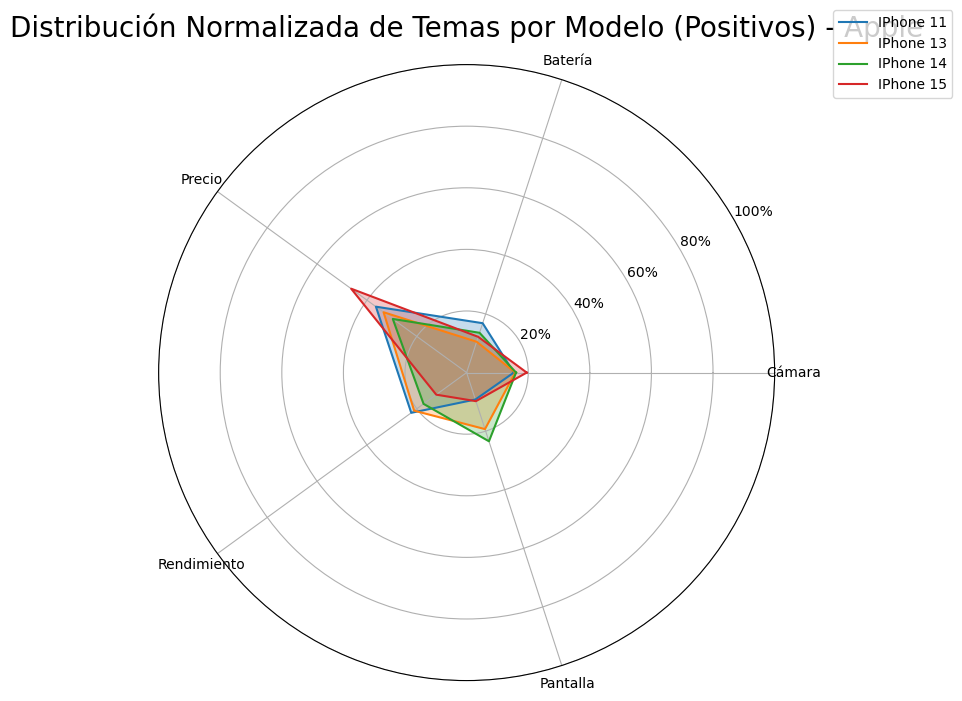

Gráfico Normalizado para Comentarios Negativos - Apple


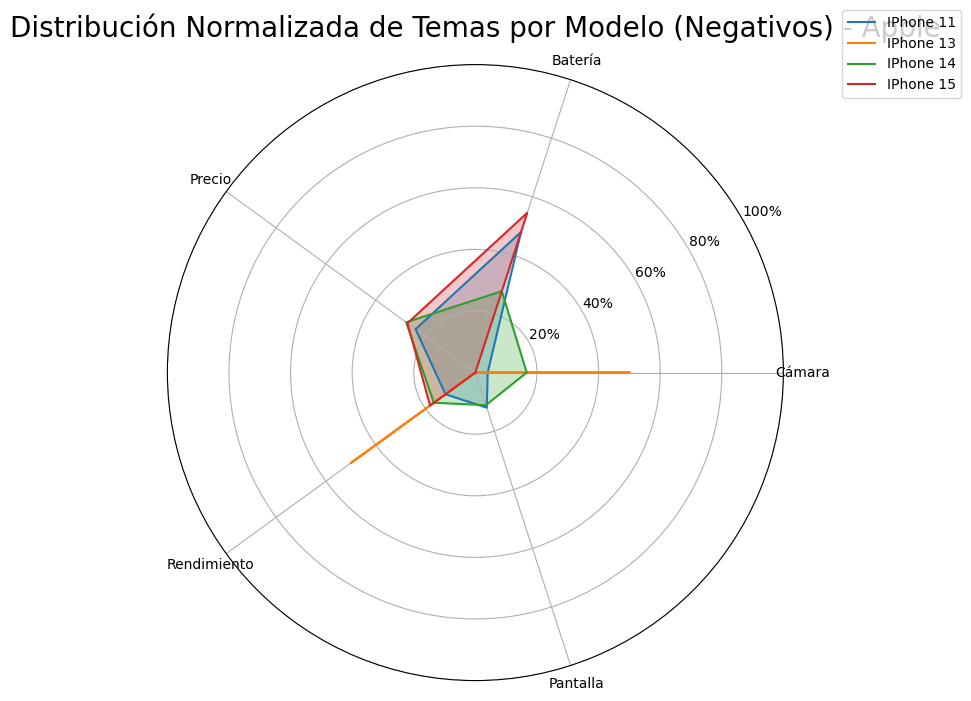

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Función para asignar temas con exclusiones
def asignar_tema(comentario, temas, exclusiones={}):
    comentario_temas = []
    for tema, palabras_clave in temas.items():
        for palabra in palabras_clave:
            if re.search(rf"\b{re.escape(palabra)}\b", comentario, re.IGNORECASE):
                # Aplicar la regla de exclusión
                excluir = False
                if palabra in exclusiones:
                    for frase_exclusion in exclusiones[palabra]:
                        if frase_exclusion in comentario:
                            excluir = True
                            break
                if not excluir:
                    comentario_temas.append(tema)
                    break  # Evita asignar el mismo tema varias veces
    return comentario_temas

# Dividir el DataFrame en positivos y negativos usando 'Calificacion Predicha'
positivos = df_as[df_as['Calificacion Predicha'] > 3]
negativos = df_as[df_as['Calificacion Predicha'] <= 3]

# Función para calcular el conteo de temas por modelo
def calcular_temas_por_modelo(df, temas, exclusiones={}):  # Agregar exclusiones como argumento opcional
    # Asignar temas a cada comentario
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
    
    # Expandir los temas en filas separadas
    df_tematicos = df.explode('Temas')
    
    # Calcular el total de comentarios por tema y modelo
    resultados = df_tematicos.groupby(['Marca', 'Modelo estandar', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por modelo para positivos y negativos (sin exclusiones)
temas_positivos = calcular_temas_por_modelo(positivos, temas, {})
temas_negativos = calcular_temas_por_modelo(negativos, temas, {})

# Función para preparar los datos normalizados para gráficos de radar por modelo
def preparar_datos_radar_modelo(resultados, marca, temas):
    radar_data = {}
    # Filtrar resultados por la marca específica
    resultados_marca = resultados[resultados['Marca'] == marca]
    
    # Obtener modelos únicos de esa marca
    modelos = resultados_marca['Modelo estandar'].unique()
    
    for modelo in modelos:
        modelo_data = resultados_marca[resultados_marca['Modelo estandar'] == modelo]
        total_comentarios = modelo_data['Total_Comentarios'].sum()  # Total de comentarios del modelo
        valores = []
        for tema in temas.keys():
            total = modelo_data[modelo_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = (total / total_comentarios) * 100 if total_comentarios > 0 else 0  # Normalizar
            valores.append(porcentaje)
        radar_data[modelo] = valores
    return radar_data

# Función para graficar radar charts normalizados por modelo
def graficar_radar_modelos(data, temas, titulo, marca):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for modelo, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=modelo)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(f"{titulo} - {marca}", size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])  # Límites de porcentaje
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Obtener marcas únicas
marcas = df_as['Marca'].unique()

# Generar gráficos de radar por marca y modelos
for marca in marcas:
    # Preparar los datos para la marca actual (positivos y negativos)
    radar_positivos_marca = preparar_datos_radar_modelo(temas_positivos, marca, temas)
    radar_negativos_marca = preparar_datos_radar_modelo(temas_negativos, marca, temas)

    # Graficar para comentarios positivos
    print(f"Gráfico Normalizado para Comentarios Positivos - {marca}")
    graficar_radar_modelos(radar_positivos_marca, temas, "Distribución Normalizada de Temas por Modelo (Positivos)", marca)

    # Graficar para comentarios negativos
    print(f"Gráfico Normalizado para Comentarios Negativos - {marca}")
    graficar_radar_modelos(radar_negativos_marca, temas, "Distribución Normalizada de Temas por Modelo (Negativos)", marca)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Función para asignar temas con exclusiones
def asignar_tema(comentario, temas, exclusiones={}):
    comentario_temas = []
    for tema, palabras_clave in temas.items():
        for palabra in palabras_clave:
            if re.search(rf"\b{re.escape(palabra)}\b", comentario, re.IGNORECASE):
                excluir = False
                if palabra in exclusiones:
                    for frase_exclusion in exclusiones[palabra]:
                        if frase_exclusion in comentario:
                            excluir = True
                            break
                if not excluir:
                    comentario_temas.append(tema)
                    break
    return comentario_temas

# Dividir el DataFrame en positivos y negativos usando 'Calificacion Predicha'
positivos = df_as[df_as['Calificacion Predicha'] > 3]
negativos = df_as[df_as['Calificacion Predicha'] <= 3]

# Función para calcular el conteo de temas por modelo
def calcular_temas_por_modelo(df, temas, exclusiones={}):
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))
    df_tematicos = df.explode('Temas')
    resultados = df_tematicos.groupby(['Marca', 'Modelo estandar', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por modelo para positivos y negativos
temas_positivos = calcular_temas_por_modelo(positivos, temas, {})
temas_negativos = calcular_temas_por_modelo(negativos, temas, {})

# Función para preparar y exportar los datos normalizados para gráficos de radar por modelo
def preparar_datos_radar_modelo_exportar(resultados, marca, temas):
    radar_data = {}
    data_list = []  # Lista para construir el DataFrame exportable

    resultados_marca = resultados[resultados['Marca'] == marca]
    modelos = resultados_marca['Modelo estandar'].unique()

    for modelo in modelos:
        modelo_data = resultados_marca[resultados_marca['Modelo estandar'] == modelo]
        total_comentarios = modelo_data['Total_Comentarios'].sum()  # Total de comentarios del modelo
        valores = []
        for tema in temas.keys():
            total = modelo_data[modelo_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = round((total / total_comentarios) * 100, 2) if total_comentarios > 0 else 0  # Normalizar
            valores.append(porcentaje)
            # Agregar datos al DataFrame
            data_list.append({'Marca': marca, 'Modelo': modelo, 'Tema': tema, 'Porcentaje_Normalizado': porcentaje})

        radar_data[modelo] = valores

    # Crear DataFrame con los resultados
    df_radar = pd.DataFrame(data_list)
    return radar_data, df_radar

# Preparar y exportar los datos normalizados para gráficos por modelo
df_positivos_modelos = []
df_negativos_modelos = []

for marca in marcas:
    radar_positivos_marca, df_positivos_marca = preparar_datos_radar_modelo_exportar(temas_positivos, marca, temas)
    radar_negativos_marca, df_negativos_marca = preparar_datos_radar_modelo_exportar(temas_negativos, marca, temas)
    
    # Agregar a las listas de DataFrames
    df_positivos_modelos.append(df_positivos_marca)
    df_negativos_modelos.append(df_negativos_marca)

# Concatenar todos los DataFrames por modelo
df_positivos_modelos = pd.concat(df_positivos_modelos, ignore_index=True)
df_negativos_modelos = pd.concat(df_negativos_modelos, ignore_index=True)

# Exportar los DataFrames
df_positivos_modelos.to_csv("D:/Documents/Scrapping Sentimientos Project/Project_repository/Analisis de Sentimientos/comentarios_positivos_modelos_radar.csv", index=False, encoding='utf-8')
df_negativos_modelos.to_csv("D:/Documents/Scrapping Sentimientos Project/Project_repository/Analisis de Sentimientos/comentarios_negativos_modelos_radar.csv", index=False, encoding='utf-8')

# Mostrar los DataFrames generados
print("Datos para Comentarios Positivos por Modelo:")
print(df_positivos_modelos.head())

print("Datos para Comentarios Negativos por Modelo:")
print(df_negativos_modelos.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\883979978.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))


Datos para Comentarios Positivos por Modelo:
    Marca              Modelo         Tema  Porcentaje_Normalizado
0  Xiaomi  Xiaomi Poco X6 Pro       Cámara                    8.12
1  Xiaomi  Xiaomi Poco X6 Pro      Batería                   18.78
2  Xiaomi  Xiaomi Poco X6 Pro       Precio                   28.93
3  Xiaomi  Xiaomi Poco X6 Pro  Rendimiento                   36.04
4  Xiaomi  Xiaomi Poco X6 Pro     Pantalla                    8.12
Datos para Comentarios Negativos por Modelo:
    Marca              Modelo         Tema  Porcentaje_Normalizado
0  Xiaomi  Xiaomi Poco X6 Pro       Cámara                    8.82
1  Xiaomi  Xiaomi Poco X6 Pro      Batería                   35.29
2  Xiaomi  Xiaomi Poco X6 Pro       Precio                   17.65
3  Xiaomi  Xiaomi Poco X6 Pro  Rendimiento                   20.59
4  Xiaomi  Xiaomi Poco X6 Pro     Pantalla                   17.65


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\883979978.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas, exclusiones))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\1960764235.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8624\1960764235.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))


Gráfico Normalizado para Comentarios Positivos - Xiaomi


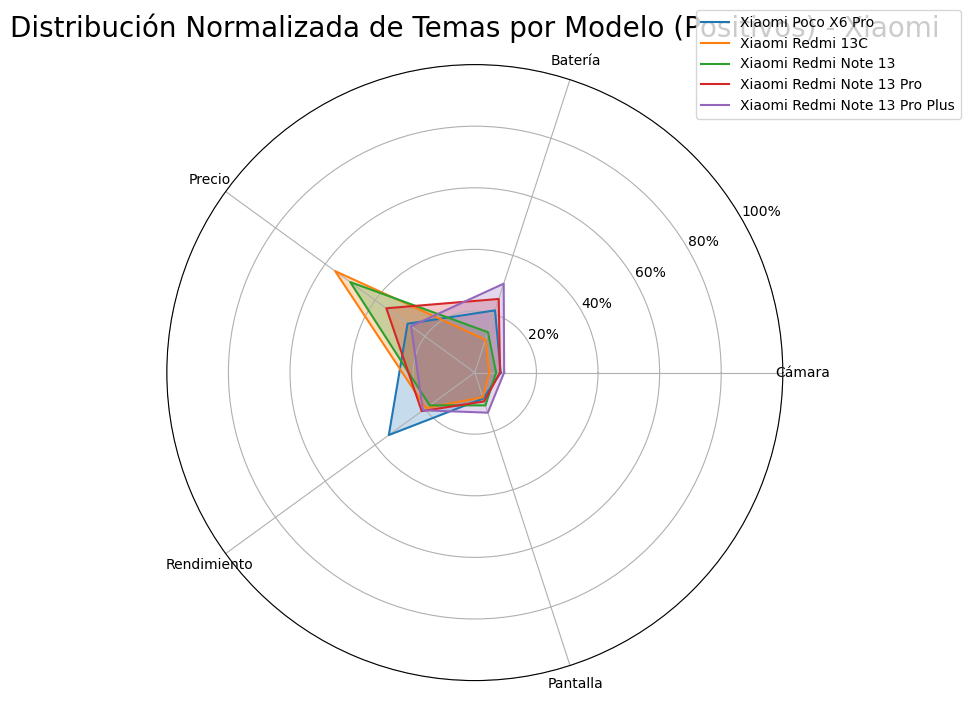

Gráfico Normalizado para Comentarios Negativos - Xiaomi


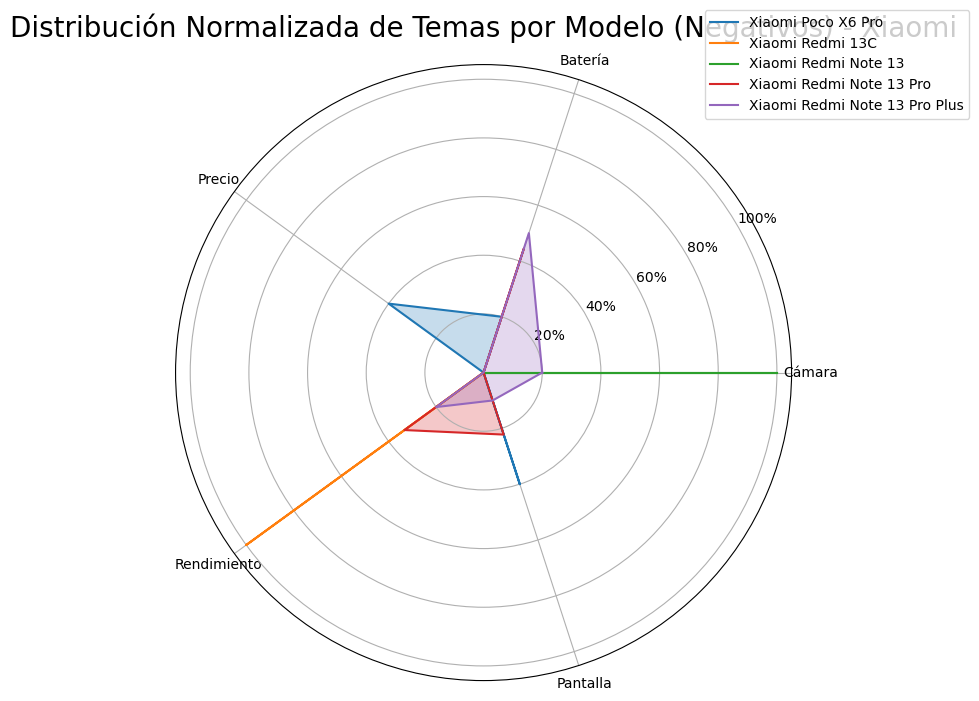

Gráfico Normalizado para Comentarios Positivos - Samsung


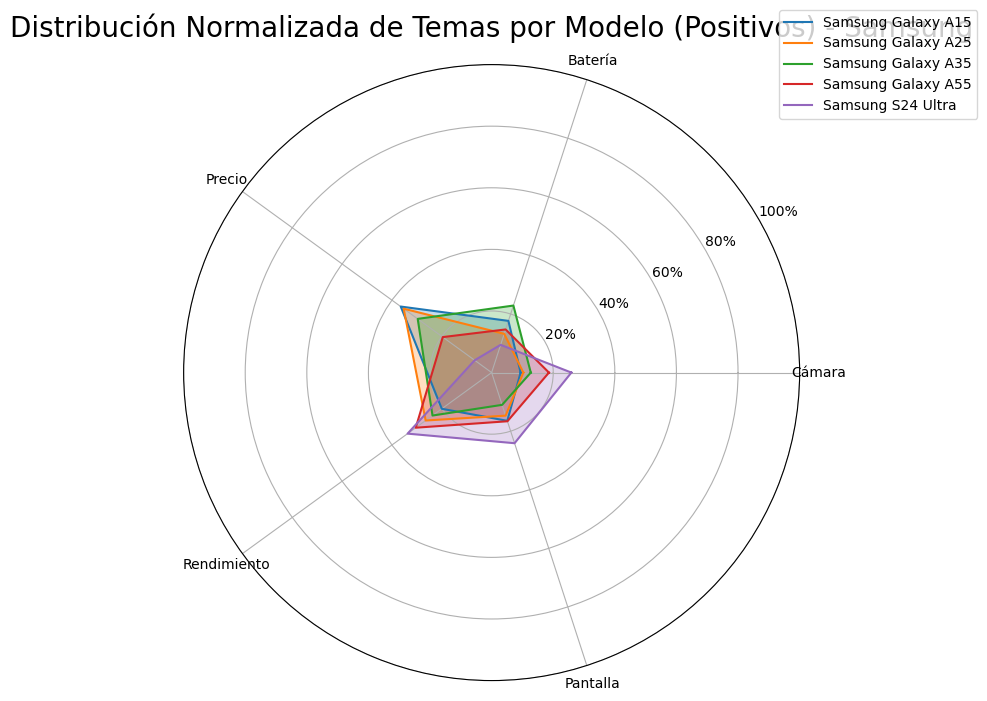

Gráfico Normalizado para Comentarios Negativos - Samsung


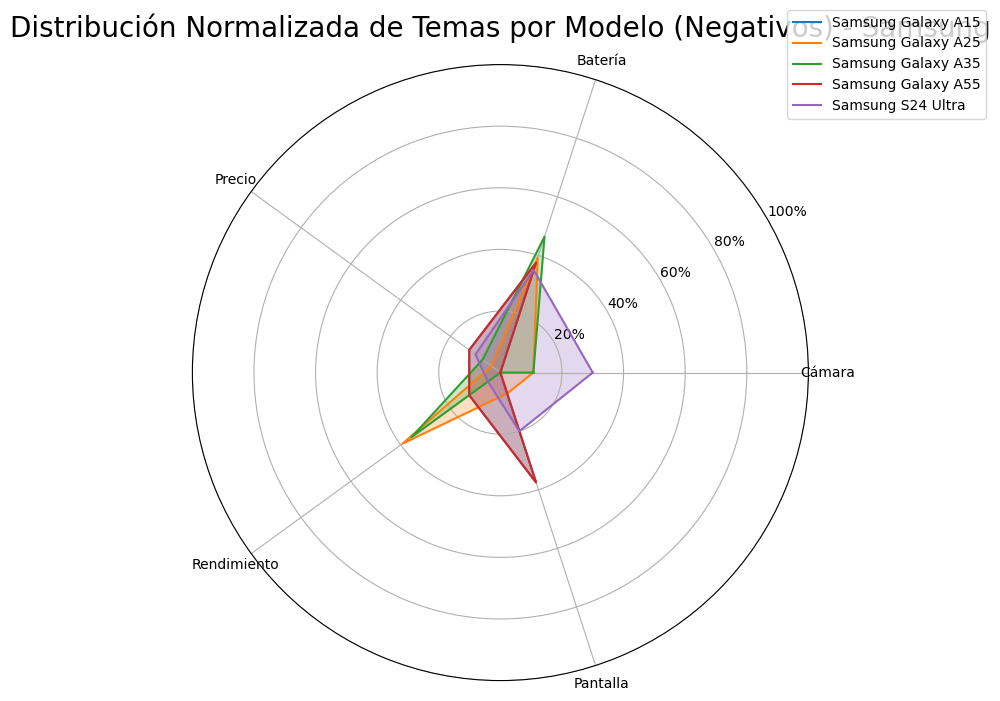

Gráfico Normalizado para Comentarios Positivos - Apple


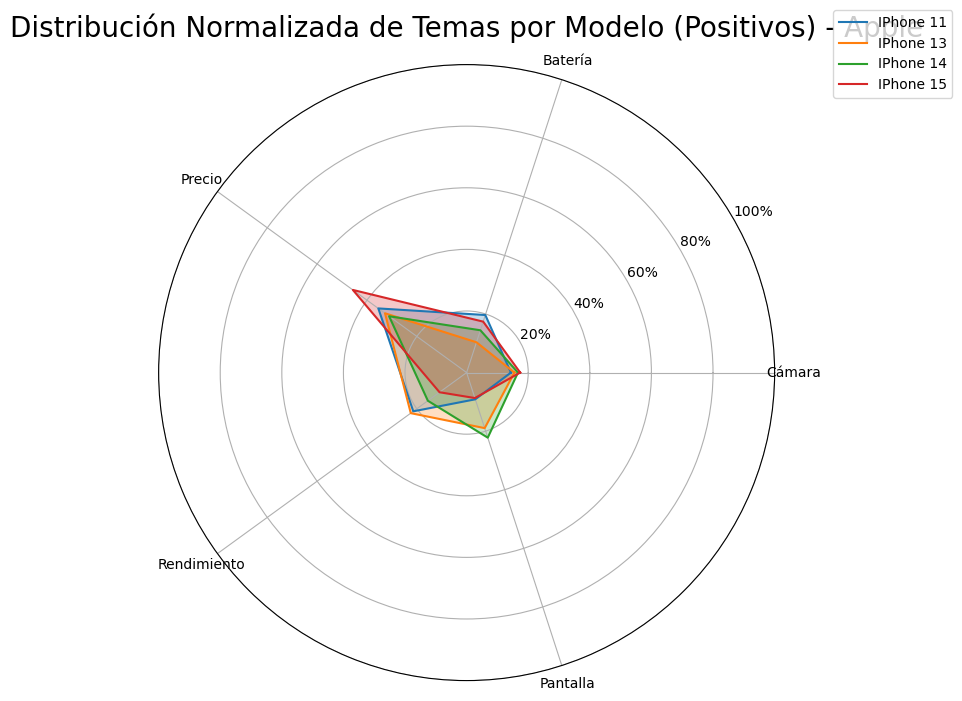

Gráfico Normalizado para Comentarios Negativos - Apple


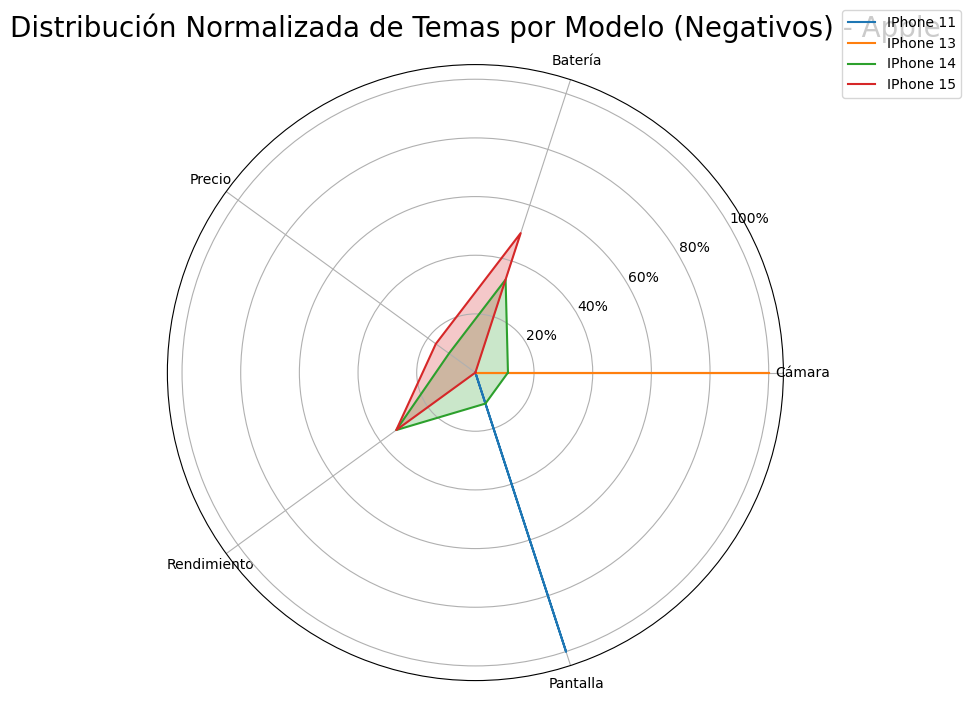

In [20]:
# Dividir el DataFrame en positivos y negativos usando 'calificacion'
positivos = df_as[df_as['calificacion'] > 3]
negativos = df_as[df_as['calificacion'] <= 3]

# Función para calcular el conteo de temas por modelo
def calcular_temas_por_modelo(df, temas):
    # Asignar temas a cada comentario
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))
    
    # Expandir los temas en filas separadas
    df_tematicos = df.explode('Temas')
    
    # Calcular el total de comentarios por tema y modelo
    resultados = df_tematicos.groupby(['Marca', 'Modelo estandar', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por modelo para positivos y negativos
temas_positivos = calcular_temas_por_modelo(positivos, temas)
temas_negativos = calcular_temas_por_modelo(negativos, temas)

# Función para preparar los datos normalizados para gráficos de radar por modelo
def preparar_datos_radar_modelo(resultados, marca, temas):
    radar_data = {}
    # Filtrar resultados por la marca específica
    resultados_marca = resultados[resultados['Marca'] == marca]
    
    # Obtener modelos únicos de esa marca
    modelos = resultados_marca['Modelo estandar'].unique()
    
    for modelo in modelos:
        modelo_data = resultados_marca[resultados_marca['Modelo estandar'] == modelo]
        total_comentarios = modelo_data['Total_Comentarios'].sum()  # Total de comentarios del modelo
        valores = []
        for tema in temas.keys():
            total = modelo_data[modelo_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = (total / total_comentarios) * 100 if total_comentarios > 0 else 0  # Normalizar
            valores.append(porcentaje)
        radar_data[modelo] = valores
    return radar_data

# Función para graficar radar charts normalizados por modelo
def graficar_radar_modelos(data, temas, titulo, marca):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for modelo, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=modelo)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(f"{titulo} - {marca}", size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])  # Límites de porcentaje
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Obtener marcas únicas
marcas = df_as['Marca'].unique()

# Generar gráficos de radar por marca y modelos
for marca in marcas:
    # Preparar los datos para la marca actual (positivos y negativos)
    radar_positivos_marca = preparar_datos_radar_modelo(temas_positivos, marca, temas)
    radar_negativos_marca = preparar_datos_radar_modelo(temas_negativos, marca, temas)

    # Graficar para comentarios positivos
    print(f"Gráfico Normalizado para Comentarios Positivos - {marca}")
    graficar_radar_modelos(radar_positivos_marca, temas, "Distribución Normalizada de Temas por Modelo (Positivos)", marca)

    # Graficar para comentarios negativos
    print(f"Gráfico Normalizado para Comentarios Negativos - {marca}")
    graficar_radar_modelos(radar_negativos_marca, temas, "Distribución Normalizada de Temas por Modelo (Negativos)", marca)

In [21]:
#Guardar df en un archivo CSV
df_as.to_csv("../Analisis de Sentimientos/sentiment_analysis.csv", index=False)